# Standard Problem for Ferromagnetic Resonance Simulation

## Google Colab Link

The demo can be run on Google Colab without any local installation.
Use the following [link](https://colab.research.google.com/drive/1mN56sxjhgPuLA5yB7z3skmZ2cy733BbS) to try it out.

In [1]:
!pip install -q magnumnp numpy==1.22.4

## Run Demo:

In [2]:
from magnumnp import *
import torch
from math import sin, cos, pi

Timer.enable()

# initialize mesh
eps = 1e-15
n = (24, 24, 2)
l = (120e-9, 120e-9, 10e-9)
dx = (l[0]/n[0], l[1]/n[1], l[2]/n[2])
origin = (-n[0]*dx[0]/2., -n[1]*dx[1]/2., -n[2]*dx[2]/2.)
mesh = Mesh(n, dx, origin=origin)

# initialize state
state = State(mesh)
state.material = {
    "alpha": 1.,
    "Ms": 800e3,
    "A": 13e-12
    }
state.m = state.Constant([0, 0, 1])

#relax state
demag    = DemagField()
exchange = ExchangeField()
bias     = ExternalField(80e3*state.Tensor([1., 0.715, 0]).normalize())

llg = LLGSolver([demag, exchange, bias])
llg.relax(state)
write_vti(state.m, "data/m0.vti")

#integrate
state.t = 0.0
state.material["alpha"] = 0.008 
bias = ExternalField(80e3*state.Tensor([1., 0.7, 0]).normalize())

llg = LLGSolver([demag, exchange, bias])
logger = Logger("data", ['t', 'm'], ["m"])
while state.t < 10e-9-eps:
    llg.step(state, 5e-12)
    logger << state

Timer.print_report()


2023-05-08 12:48:13  magnum.np:INFO magnum.np 1.0.9
2023-05-08 12:48:13  magnum.np:INFO [State] running on device: cpu (dtype = float64)
2023-05-08 12:48:13  magnum.np:INFO [Mesh] 24x24x2 (size= 5e-09 x 5e-09 x 5e-09)
2023-05-08 12:48:14  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)
2023-05-08 12:48:37  magnum.np:INFO [DEMAG]: Time calculation of demag kernel = 23.676497220993042 s
2023-05-08 12:49:04  magnum.np:INFO [LLG] relax: t=1e-11 dE=0.0479888 E=4.57608e-17
2023-05-08 12:49:04  magnum.np:INFO [LLG] relax: t=2e-11 dE=0.180908 E=3.87505e-17
2023-05-08 12:49:04  magnum.np:INFO [LLG] relax: t=3e-11 dE=0.504086 E=2.57635e-17
2023-05-08 12:49:05  magnum.np:INFO [LLG] relax: t=4e-11 dE=0.595849 E=1.61441e-17
2023-05-08 12:49:05  magnum.np:INFO [LLG] relax: t=5e-11 dE=0.300941 E=1.24095e-17
2023-05-08 12:49:05  magnum.np:INFO [LLG] relax: t=6e-11 dE=0.137214 E=1.09122e-17
2023-05-08 12:49:05  magnum.np:INFO [LLG] relax: t=7e-11 dE=0.123262 E=9.71477e-18
2023-05-08 12:49:

2023-05-08 12:49:30  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.7e-10
2023-05-08 12:49:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.75e-10
2023-05-08 12:49:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.8e-10
2023-05-08 12:49:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.85e-10
2023-05-08 12:49:32  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.9e-10
2023-05-08 12:49:32  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.95e-10
2023-05-08 12:49:32  magnum.np:INFO [LLG] step: dt= 5e-12  t=2e-10
2023-05-08 12:49:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.05e-10
2023-05-08 12:49:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.1e-10
2023-05-08 12:49:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.15e-10
2023-05-08 12:49:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.2e-10
2023-05-08 12:49:34  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.25e-10
2023-05-08 12:49:34  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.3e-10
2023-05-08 12:49:34  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.35e-10
2023-05-08 12:49:35  magnum.n

2023-05-08 12:50:00  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.65e-10
2023-05-08 12:50:01  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.7e-10
2023-05-08 12:50:01  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.75e-10
2023-05-08 12:50:01  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.8e-10
2023-05-08 12:50:02  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.85e-10
2023-05-08 12:50:02  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.9e-10
2023-05-08 12:50:02  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.95e-10
2023-05-08 12:50:02  magnum.np:INFO [LLG] step: dt= 5e-12  t=7e-10
2023-05-08 12:50:03  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.05e-10
2023-05-08 12:50:03  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.1e-10
2023-05-08 12:50:03  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.15e-10
2023-05-08 12:50:04  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.2e-10
2023-05-08 12:50:04  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.25e-10
2023-05-08 12:50:04  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.3e-10
2023-05-08 12:50:05  magnum.n

2023-05-08 12:50:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.155e-09
2023-05-08 12:50:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.16e-09
2023-05-08 12:50:32  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.165e-09
2023-05-08 12:50:32  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.17e-09
2023-05-08 12:50:32  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.175e-09
2023-05-08 12:50:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.18e-09
2023-05-08 12:50:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.185e-09
2023-05-08 12:50:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.19e-09
2023-05-08 12:50:34  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.195e-09
2023-05-08 12:50:34  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.2e-09
2023-05-08 12:50:34  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.205e-09
2023-05-08 12:50:35  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.21e-09
2023-05-08 12:50:35  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.215e-09
2023-05-08 12:50:35  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.22e-09
2023-05-08 12:

2023-05-08 12:51:02  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.645e-09
2023-05-08 12:51:03  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.65e-09
2023-05-08 12:51:03  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.655e-09
2023-05-08 12:51:03  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.66e-09
2023-05-08 12:51:04  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.665e-09
2023-05-08 12:51:04  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.67e-09
2023-05-08 12:51:05  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.675e-09
2023-05-08 12:51:05  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.68e-09
2023-05-08 12:51:05  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.685e-09
2023-05-08 12:51:06  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.69e-09
2023-05-08 12:51:06  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.695e-09
2023-05-08 12:51:06  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.7e-09
2023-05-08 12:51:07  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.705e-09
2023-05-08 12:51:07  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.71e-09
2023-05-08 12:

2023-05-08 12:51:35  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.135e-09
2023-05-08 12:51:35  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.14e-09
2023-05-08 12:51:35  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.145e-09
2023-05-08 12:51:36  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.15e-09
2023-05-08 12:51:36  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.155e-09
2023-05-08 12:51:36  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.16e-09
2023-05-08 12:51:37  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.165e-09
2023-05-08 12:51:37  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.17e-09
2023-05-08 12:51:37  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.175e-09
2023-05-08 12:51:38  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.18e-09
2023-05-08 12:51:38  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.185e-09
2023-05-08 12:51:38  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.19e-09
2023-05-08 12:51:39  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.195e-09
2023-05-08 12:51:39  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.2e-09
2023-05-08 12:

2023-05-08 12:52:04  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.625e-09
2023-05-08 12:52:04  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.63e-09
2023-05-08 12:52:04  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.635e-09
2023-05-08 12:52:05  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.64e-09
2023-05-08 12:52:05  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.645e-09
2023-05-08 12:52:05  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.65e-09
2023-05-08 12:52:05  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.655e-09
2023-05-08 12:52:06  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.66e-09
2023-05-08 12:52:06  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.665e-09
2023-05-08 12:52:06  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.67e-09
2023-05-08 12:52:06  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.675e-09
2023-05-08 12:52:07  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.68e-09
2023-05-08 12:52:07  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.685e-09
2023-05-08 12:52:07  magnum.np:INFO [LLG] step: dt= 5e-12  t=2.69e-09
2023-05-08 12

2023-05-08 12:52:30  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.115e-09
2023-05-08 12:52:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.12e-09
2023-05-08 12:52:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.125e-09
2023-05-08 12:52:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.13e-09
2023-05-08 12:52:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.135e-09
2023-05-08 12:52:32  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.14e-09
2023-05-08 12:52:32  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.145e-09
2023-05-08 12:52:32  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.15e-09
2023-05-08 12:52:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.155e-09
2023-05-08 12:52:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.16e-09
2023-05-08 12:52:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.165e-09
2023-05-08 12:52:34  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.17e-09
2023-05-08 12:52:34  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.175e-09
2023-05-08 12:52:34  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.18e-09
2023-05-08 12

2023-05-08 12:53:08  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.6e-09
2023-05-08 12:53:08  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.605e-09
2023-05-08 12:53:08  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.61e-09
2023-05-08 12:53:09  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.615e-09
2023-05-08 12:53:09  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.62e-09
2023-05-08 12:53:10  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.625e-09
2023-05-08 12:53:10  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.63e-09
2023-05-08 12:53:10  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.635e-09
2023-05-08 12:53:10  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.64e-09
2023-05-08 12:53:11  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.645e-09
2023-05-08 12:53:11  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.65e-09
2023-05-08 12:53:11  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.655e-09
2023-05-08 12:53:11  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.66e-09
2023-05-08 12:53:12  magnum.np:INFO [LLG] step: dt= 5e-12  t=3.665e-09
2023-05-08 12:

2023-05-08 12:53:38  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.09e-09
2023-05-08 12:53:39  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.095e-09
2023-05-08 12:53:39  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.1e-09
2023-05-08 12:53:40  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.105e-09
2023-05-08 12:53:40  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.11e-09
2023-05-08 12:53:40  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.115e-09
2023-05-08 12:53:41  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.12e-09
2023-05-08 12:53:41  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.125e-09
2023-05-08 12:53:41  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.13e-09
2023-05-08 12:53:42  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.135e-09
2023-05-08 12:53:42  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.14e-09
2023-05-08 12:53:42  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.145e-09
2023-05-08 12:53:43  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.15e-09
2023-05-08 12:53:43  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.155e-09
2023-05-08 12:

2023-05-08 12:54:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.58e-09
2023-05-08 12:54:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.585e-09
2023-05-08 12:54:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.59e-09
2023-05-08 12:54:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.595e-09
2023-05-08 12:54:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.6e-09
2023-05-08 12:54:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.605e-09
2023-05-08 12:54:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.61e-09
2023-05-08 12:54:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.615e-09
2023-05-08 12:54:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.62e-09
2023-05-08 12:54:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.625e-09
2023-05-08 12:54:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.63e-09
2023-05-08 12:54:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.635e-09
2023-05-08 12:54:20  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.64e-09
2023-05-08 12:54:20  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.645e-09
2023-05-08 12:

2023-05-08 12:54:52  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.07e-09
2023-05-08 12:54:52  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.075e-09
2023-05-08 12:54:52  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.08e-09
2023-05-08 12:54:53  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.085e-09
2023-05-08 12:54:53  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.09e-09
2023-05-08 12:54:53  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.095e-09
2023-05-08 12:54:54  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.1e-09
2023-05-08 12:54:54  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.105e-09
2023-05-08 12:54:54  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.11e-09
2023-05-08 12:54:55  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.115e-09
2023-05-08 12:54:55  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.12e-09
2023-05-08 12:54:55  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.125e-09
2023-05-08 12:54:56  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.13e-09
2023-05-08 12:54:56  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.135e-09
2023-05-08 12:

2023-05-08 12:55:29  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.56e-09
2023-05-08 12:55:30  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.565e-09
2023-05-08 12:55:30  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.57e-09
2023-05-08 12:55:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.575e-09
2023-05-08 12:55:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.58e-09
2023-05-08 12:55:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.585e-09
2023-05-08 12:55:31  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.59e-09
2023-05-08 12:55:32  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.595e-09
2023-05-08 12:55:32  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.6e-09
2023-05-08 12:55:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.605e-09
2023-05-08 12:55:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.61e-09
2023-05-08 12:55:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.615e-09
2023-05-08 12:55:34  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.62e-09
2023-05-08 12:55:34  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.625e-09
2023-05-08 12:

2023-05-08 12:56:07  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.05e-09
2023-05-08 12:56:08  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.055e-09
2023-05-08 12:56:08  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.06e-09
2023-05-08 12:56:08  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.065e-09
2023-05-08 12:56:09  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.07e-09
2023-05-08 12:56:09  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.075e-09
2023-05-08 12:56:10  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.08e-09
2023-05-08 12:56:10  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.085e-09
2023-05-08 12:56:10  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.09e-09
2023-05-08 12:56:10  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.095e-09
2023-05-08 12:56:11  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.1e-09
2023-05-08 12:56:11  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.105e-09
2023-05-08 12:56:12  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.11e-09
2023-05-08 12:56:12  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.115e-09
2023-05-08 12:

2023-05-08 12:56:44  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.54e-09
2023-05-08 12:56:45  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.545e-09
2023-05-08 12:56:45  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.55e-09
2023-05-08 12:56:45  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.555e-09
2023-05-08 12:56:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.56e-09
2023-05-08 12:56:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.565e-09
2023-05-08 12:56:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.57e-09
2023-05-08 12:56:47  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.575e-09
2023-05-08 12:56:47  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.58e-09
2023-05-08 12:56:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.585e-09
2023-05-08 12:56:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.59e-09
2023-05-08 12:56:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.595e-09
2023-05-08 12:56:49  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.6e-09
2023-05-08 12:56:49  magnum.np:INFO [LLG] step: dt= 5e-12  t=6.605e-09
2023-05-08 12:

2023-05-08 12:57:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.03e-09
2023-05-08 12:57:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.035e-09
2023-05-08 12:57:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.04e-09
2023-05-08 12:57:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.045e-09
2023-05-08 12:57:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.05e-09
2023-05-08 12:57:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.055e-09
2023-05-08 12:57:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.06e-09
2023-05-08 12:57:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.065e-09
2023-05-08 12:57:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.07e-09
2023-05-08 12:57:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.075e-09
2023-05-08 12:57:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.08e-09
2023-05-08 12:57:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.085e-09
2023-05-08 12:57:20  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.09e-09
2023-05-08 12:57:20  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.095e-09
2023-05-08 12

2023-05-08 12:57:44  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.52e-09
2023-05-08 12:57:45  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.525e-09
2023-05-08 12:57:45  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.53e-09
2023-05-08 12:57:45  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.535e-09
2023-05-08 12:57:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.54e-09
2023-05-08 12:57:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.545e-09
2023-05-08 12:57:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.55e-09
2023-05-08 12:57:47  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.555e-09
2023-05-08 12:57:47  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.56e-09
2023-05-08 12:57:47  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.565e-09
2023-05-08 12:57:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.57e-09
2023-05-08 12:57:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.575e-09
2023-05-08 12:57:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.58e-09
2023-05-08 12:57:49  magnum.np:INFO [LLG] step: dt= 5e-12  t=7.585e-09
2023-05-08 12

2023-05-08 12:58:15  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.01e-09
2023-05-08 12:58:15  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.015e-09
2023-05-08 12:58:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.02e-09
2023-05-08 12:58:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.025e-09
2023-05-08 12:58:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.03e-09
2023-05-08 12:58:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.035e-09
2023-05-08 12:58:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.04e-09
2023-05-08 12:58:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.045e-09
2023-05-08 12:58:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.05e-09
2023-05-08 12:58:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.055e-09
2023-05-08 12:58:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.06e-09
2023-05-08 12:58:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.065e-09
2023-05-08 12:58:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.07e-09
2023-05-08 12:58:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.075e-09
2023-05-08 12

2023-05-08 12:58:44  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.5e-09
2023-05-08 12:58:44  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.505e-09
2023-05-08 12:58:45  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.51e-09
2023-05-08 12:58:45  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.515e-09
2023-05-08 12:58:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.52e-09
2023-05-08 12:58:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.525e-09
2023-05-08 12:58:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.53e-09
2023-05-08 12:58:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.535e-09
2023-05-08 12:58:47  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.54e-09
2023-05-08 12:58:47  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.545e-09
2023-05-08 12:58:47  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.55e-09
2023-05-08 12:58:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.555e-09
2023-05-08 12:58:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.56e-09
2023-05-08 12:58:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.565e-09
2023-05-08 12:

2023-05-08 12:59:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.99e-09
2023-05-08 12:59:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=8.995e-09
2023-05-08 12:59:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=9e-09
2023-05-08 12:59:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.005e-09
2023-05-08 12:59:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.01e-09
2023-05-08 12:59:17  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.015e-09
2023-05-08 12:59:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.02e-09
2023-05-08 12:59:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.025e-09
2023-05-08 12:59:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.03e-09
2023-05-08 12:59:18  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.035e-09
2023-05-08 12:59:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.04e-09
2023-05-08 12:59:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.045e-09
2023-05-08 12:59:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.05e-09
2023-05-08 12:59:20  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.055e-09
2023-05-08 12:59

2023-05-08 12:59:44  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.48e-09
2023-05-08 12:59:45  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.485e-09
2023-05-08 12:59:45  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.49e-09
2023-05-08 12:59:45  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.495e-09
2023-05-08 12:59:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.5e-09
2023-05-08 12:59:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.505e-09
2023-05-08 12:59:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.51e-09
2023-05-08 12:59:46  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.515e-09
2023-05-08 12:59:47  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.52e-09
2023-05-08 12:59:47  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.525e-09
2023-05-08 12:59:47  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.53e-09
2023-05-08 12:59:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.535e-09
2023-05-08 12:59:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.54e-09
2023-05-08 12:59:48  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.545e-09
2023-05-08 12:

2023-05-08 13:00:14  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.97e-09
2023-05-08 13:00:15  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.975e-09
2023-05-08 13:00:15  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.98e-09
2023-05-08 13:00:15  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.985e-09
2023-05-08 13:00:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.99e-09
2023-05-08 13:00:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.995e-09
2023-05-08 13:00:16  magnum.np:INFO [LLG] step: dt= 5e-12  t=1e-08



TIMER REPORT
Operation              No of calls    Avg time [ms]    Total time [s]
-------------------  -------------  ---------------  ----------------
LLGSolver.relax                  1     65323.9              65.3239
    DemagField.h              2053        17.3304           35.5794
    ExchangeField.h           2053        12.9098           26.5039
    ExternalField.h           2053         0.176763          0.362895
LLGSolver.step                2000       261.859           523.718
    DemagField.h             70020         5.18752         363.23
    ExchangeField.h          70020         0.523453         36.6522
    ExternalField.h          70020         0.160674         11.2504
-------------------  -------------  ---------------  ----------------
Total                                                      722.954
Missing                                                    133.912



## Plot Results:

In [3]:
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sp_FMR/ref/m_ref.dat

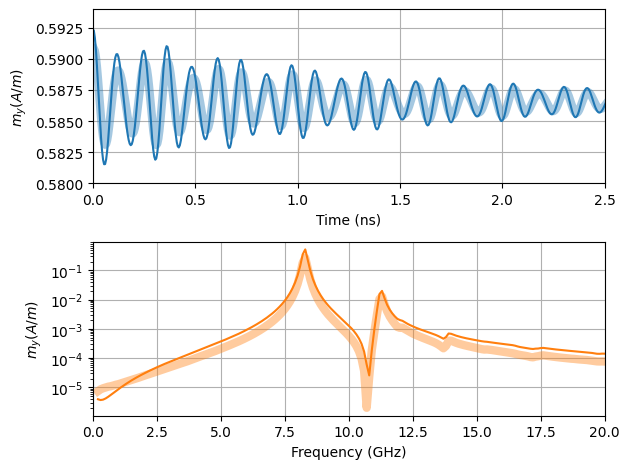

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/log.dat")
data_ref = np.loadtxt("ref/m_ref.dat")

t, mx, my, mz = data.T
t_ref, mx_ref, my_ref, mz_ref = data_ref.T

sy = abs((np.fft.fft(my)**2.))
sy_ref = abs((np.fft.fft(my_ref)**2.))
f = np.fft.fftfreq(len(t), t[1]-t[0])*1e-9
f_ref = np.fft.fftfreq(len(t_ref), t_ref[1]-t_ref[0])*1e-9


fig, (ax0, ax1) = plt.subplots(2,1)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax0.plot(t*1e9, my, color=cycle[0])
ax0.plot(t_ref*1e9, my_ref, '-', color=cycle[0], linewidth=6, alpha=0.4)
ax0.set_xlabel("Time (ns)")
ax0.set_ylabel("$m_y (A/m)$")
ax0.set_xlim(0, 2.5)
ax0.set_ylim(0.580, 0.594)
ax0.grid()

ax1.plot(f[2: -len(f)//2], sy[2: -len(f)//2], '-', color=cycle[1])
ax1.plot(f_ref[2: -len(f_ref)//2], sy_ref[2: -len(f_ref)//2], '-', color=cycle[1], linewidth=6, alpha=0.4)
ax1.set_yscale("log")
ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("$m_y (A/m)$")
ax1.set_xlim(0, 20)
ax1.grid()
fig.tight_layout()
fig.savefig("data/results.png")